In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

## Importing Data

In [2]:
#read data 
x = np.genfromtxt("hw02_data_points.csv", delimiter = ",").astype(float)
y = np.genfromtxt("hw02_class_labels.csv", delimiter = ",").astype(int)

#number of elements
N = x.shape[0]
#number of features
D = x.shape[1]

## Divide training and test data

In [3]:
#seperate x
x_training = x[:10000]
x_test = x[10000:]

#Number of samples
N_training = x_training.shape[0]
N_test = x_test.shape[0]

#seperate y
y_training = (y[:10000])
y_test = y[10000:]

#K number of labels
K = np.max(y_training).astype(int)

# one-of-K encoding for training
Y_training = np.zeros((N_training, K)).astype(int)
Y_training[range(N_training), np.asarray(y_training - 1)] = 1 

# one-of-K encoding for test
Y_test = np.zeros((N_test, K)).astype(int)
Y_test[range(N_test), np.asarray(y_test - 1)] = 1 

## Initialize the discrimination variables

In [4]:
#Algorithm constants
eta = 0.00001
iteration_count = 1000

# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))


\begin{align*}
\dfrac{\partial \textrm{Error}}{\partial \boldsymbol{w}_{c}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})(sigmoid (1 - sigmoid)\boldsymbol{x}_{i} \\
\dfrac{\partial \textrm{Error}}{\partial w_{c0}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})(sigmoid (1 - sigmoid)
\end{align*}

## Learn the discrimination by iteration

In [5]:
## Gradient functions
## The derivation of the gradient from the error function 
## Derivative according to w is (y_truth - y_predicted)*(sigmoid *(1 - sigmoid))*x
## Derivative according to w is (y_truth - y_predicted)*(sigmoid *(1 - sigmoid))*1

def gradient_W(x, y_truth, y_predicted):
    return (np.asarray([-np.matmul((y_truth[:, k] - y_predicted[:, k])  * y_predicted[:, k] * (1 - y_predicted[:, k]), x) for k in range(K)]).transpose())

def gradient_w0(y_truth, y_predicted):
    return (-np.sum((y_truth - y_predicted) * y_predicted * (1 - y_predicted), axis = 0))

In [6]:
#Initialize the w and w0
W = np.genfromtxt("hw02_W_initial.csv", delimiter = ",", skip_header = 0).astype(float)
w0 = np.genfromtxt("hw02_w0_initial.csv", delimiter = ",", skip_header = 0).astype(float)

#Start to iteration
iteration = 1
objective_values = []
while (iteration <= iteration_count):
    Y_predicted = sigmoid(x_training, W, w0)
    #save the old w values
    w_old = W
    w0_old = w0
    
    objective_values = np.append(objective_values, 0.5 * np.sum((Y_training - Y_predicted)**2))
    
    #calculate gradient and find the new w values
    W = W - eta * gradient_W(x_training, Y_training, Y_predicted)
    w0 = w0 - eta * gradient_w0(Y_training, np.asarray(Y_predicted))
    
    #increment iteration values
    iteration = iteration + 1
    
print(W)
print(w0)

[[-0.01324798 -0.02823844 -0.00326868 ... -0.04877851  0.01212054
  -0.01143465]
 [-0.01183842 -0.03963016 -0.01295336 ... -0.04034705  0.00400381
  -0.02111644]
 [-0.01998825 -0.03633561 -0.00489235 ... -0.04108662  0.01387463
  -0.02484677]
 ...
 [-0.01341638 -0.0199712  -0.02071762 ... -0.03364511  0.00594223
  -0.01845717]
 [-0.00980747 -0.03218592 -0.02022552 ... -0.03211477  0.01611503
  -0.00845905]
 [-0.01977218 -0.02373074 -0.01468591 ... -0.04159601  0.01068509
  -0.02400039]]
[-0.01287857 -0.02891159 -0.00873806 -0.03535891 -0.02597275 -0.06542254
 -0.01501564 -0.0451543   0.00689065 -0.01964791]


## Convergence

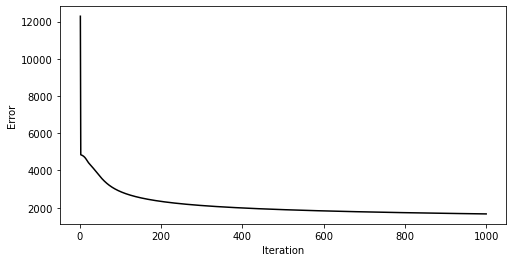

In [7]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration  ), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Confusion Training

In [29]:
# calculate confusion matrix
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_training.T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        838    3   14   44    5    0  220    0    1    0
2          4  908    1   17    4    0    3    0    2    0
3         14   12  645   14   69    0  133    0    9    1
4         89   37    5  870   41    2   55    0   12    2
5          2    6  172   28  763    0  123    0    6    0
6         16    3   26    5    8  841   30   89   25   33
7         27    3   80   28   79    0  423    0   17    0
8          0    0    0    0    0  115    1  862    8   43
9         18    0    8    5   10   13   34    2  892    0
10         1    0    0    1    0   37    0   84    2  957


## Confusion Test

In [8]:
Y_predicted = sigmoid(x_test,W,w0)
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_test.T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        397    1   11   22    0    1  129    0    0    0
2          4  459    0    8    3    0    1    0    0    0
3          7   10  320    6   49    1   52    0    5    0
4         51   15    3  443   19    1   31    0   10    0
5          2    2   83   14  382    0   58    0    1    0
6          9    2   13    2    4  405   12   39   14   18
7         14    1   50   11   47    0  218    0    9    0
8          1    0    0    0    0   47    0  387    7   27
9         16    0   10    1    2    7   18    1  459    0
10         1    0    0    0    0   28    0   44    3  472
